<a href="https://colab.research.google.com/github/FelipeSilvieri/projeto-image-classification/blob/main/Projeto_Semestral_Dados_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Potencial Engajamento no Instagram de Imagens com Redes Neurais Convolucionais (CNN)**

> Felipe Matos Silvieri             20.00314-5

> Gabriel dos Santos Couto          20.00273-4

> Gabriel Prande Bernadello         20.01288-8

## Introdução

Este projeto visa desenvolver um modelo de Machine Learning capaz de prever o potencial de engajamento de imagens no Instagram. Para isso, utilizaremos uma Rede Neural Convolucional (CNN), que é uma técnica eficaz em tarefas de classificação de imagens, para classificar o potencial de engajamento de uma imagem em uma escala de notas (de 1 a 5, por exemplo).

<table>
  <tr>
    <td>
      <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*HMP8TthpVRljInDPoNHS5A.jpeg" alt="CNN - Convolutional Neural Network" width="800">
    </td>
    <td>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/225px-Instagram_logo_2022.svg.png" alt="Instagram Logo" width="200">
    </td>
  </tr>
</table>


## Contexto

Com o crescimento das redes sociais, o engajamento tornou-se uma métrica fundamental para medir o impacto e a relevância do conteúdo. No Instagram, o engajamento de uma postagem (como uma imagem) depende de diversos fatores, incluindo a qualidade visual, a popularidade do perfil e as preferências dos seguidores. Compreender quais características contribuem para o aumento de engajamento é de interesse tanto para criadores de conteúdo quanto para analistas de mídia social.

## Desafio

Classificar o potencial de engajamento de imagens no Instagram é um desafio, pois envolve características visuais complexas que podem influenciar a interação dos usuários. Além disso, perfis diferentes apresentam escalas de engajamento variadas, o que requer um processo de normalização dos dados para garantir comparabilidade entre as imagens.

## Metodologia

A metodologia deste projeto envolve várias etapas:

- **Coleta de Dados:** Utilizaremos uma ferramenta externa chamada Apify para realizar o web scraping de perfis no Instagram. Coletaremos dados de imagens, número de curtidas, comentários e metadados como data de postagem e aspect ratio.
- **Processamento dos Dados:** Calcularemos uma métrica de engajamento com base nas curtidas e comentários, e faremos a normalização dos dados para garantir uma escala uniforme entre perfis.
- **Treinamento e Avaliação do Modelo:** Usaremos uma CNN para classificar as imagens de acordo com seu potencial de engajamento. Modelos pré-treinados serão ajustados e utilizados para melhorar a precisão do modelo.
- **Implementação:** O modelo será implementado em uma interface interativa utilizando ferramentas como Streamlit e Google Colab, para facilitar a visualização e teste dos resultados.

## Justificativa

A previsão de engajamento é uma área de crescente interesse em ciência de dados aplicada ao marketing digital. Esse projeto visa contribuir para esse campo, desenvolvendo uma ferramenta que permita aos criadores e analistas de conteúdo entenderem melhor os fatores visuais que impactam o engajamento das postagens.

# Processo de Desenvolvimento

## Captação dos Dados

> Para realizar a coleta de dados, utilizamos o Apify, uma plataforma que oferece serviços de automação e scraping para diversas aplicações. Entre elas, a ferramenta 'Instagram Scraper' permite extrair dados públicos de perfis no Instagram de maneira prática e organizada, sem a necessidade de desenvolver um script de scraping do zero.

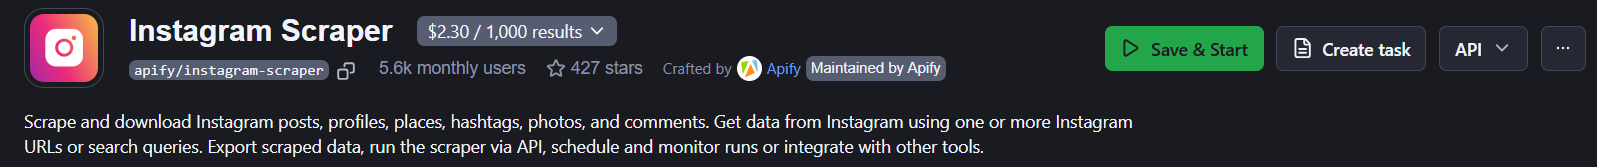

O processo de captação dos dados envolveu a seguinte ordem:
- Definir Nicho (Foi escolhido o nicho de Fotografia geral (geralmente de paisagens e natureza))
- Pesquisar Perfis do Nicho
- Selecionar Perfis que possuem uma quantidade significativa de imagens
- Utilizar a ferramenta do Apify para realizar o *scraping*
- Salvar todos os resultados como JSON, separados pra cada perfil "varrido"


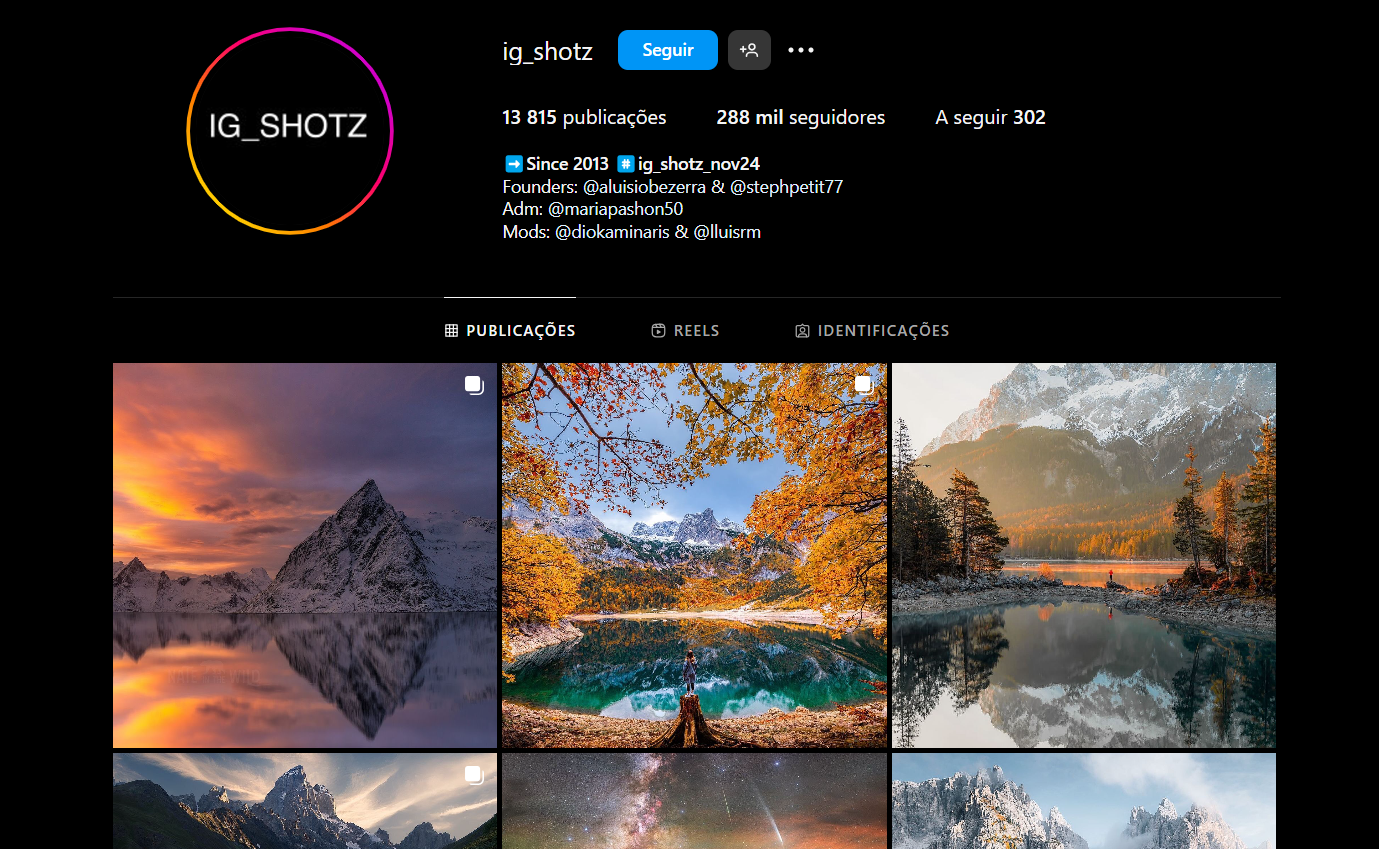

## Transformações nos Dados

In [125]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
import json
import pandas as pd
import os

# Caminhos
input_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Dados JSON/Novo"
output_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo"

# Criar o diretório de saída, caso não exista
os.makedirs(output_directory, exist_ok=True)

# Processar todos os arquivos JSON no diretório de entrada
for file_name in os.listdir(input_directory):
    if file_name.endswith(".json"):
        input_path = os.path.join(input_directory, file_name)

        # Ler o arquivo JSON
        with open(input_path, "r", encoding="utf-8") as file:
            data = json.load(file)

        # Lista para armazenar os resultados
        result = []

        # Iterar sobre os itens no JSON
        for item in data:
            parsed_item = {
                "media_type": item.get("type", ""),
                "display_url": item.get("displayUrl", ""),
                "hashtags_count": len(item.get("hashtags", [])),
                "comments_count": item.get("commentsCount", 0),
                "dimensions_height": item.get("dimensionsHeight", 0),
                "dimensions_width": item.get("dimensionsWidth", 0),
                "likes_count": item.get("likesCount", 0),
                "timestamp": item.get("timestamp", "")
            }
            result.append(parsed_item)

        # Converter a lista de resultados para um DataFrame
        df = pd.DataFrame(result)

        # Salvar o DataFrame em um arquivo CSV com o nome no formato desejado
        output_file_name = f"{os.path.splitext(file_name)[0]}_parsed.csv"
        output_path = os.path.join(output_directory, output_file_name)
        df.to_csv(output_path, index=False, encoding="utf-8")
        print(f"Arquivo processado e salvo: {output_path}")

print(f"Todos os arquivos foram processados e salvos em: {output_directory}")


Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo/southoptic_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo/theindependentphoto_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo/traveling_globee_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo/tomkingsford_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo/samuel_lesko_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo/photos_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo/marcoscaballero_parsed.csv
Arquivo processado e salvo: /content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV

In [130]:
import pandas as pd
import os

# Diretório onde os CSVs estão armazenados
csv_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/Novo"

# Dicionário para armazenar os DataFrames
dataframes = {}

# Iterar sobre todos os arquivos CSV no diretório
for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        # Criar o caminho completo do arquivo
        file_path = os.path.join(csv_directory, file_name)

        # Carregar o CSV como DataFrame
        df = pd.read_csv(file_path)

        # Pegar só imagens e 'sidecars'
        df = df[df["media_type"].isin(["Image", "Sidecar"])]

        # Pegar só itens onde likes_count for diferente de -1
        df = df[df["likes_count"] != -1]

        # Usar o nome do arquivo (sem extensão) como chave
        profile_name = os.path.splitext(file_name)[0]
        dataframes[profile_name] = df

# Exibir as chaves do dicionário para verificar
print(f"Perfis carregados: {list(dataframes.keys())}")


Perfis carregados: ['southoptic_parsed', 'theindependentphoto_parsed', 'traveling_globee_parsed', 'tomkingsford_parsed', 'samuel_lesko_parsed', 'photos_parsed', 'marcoscaballero_parsed', 'ig_shotz_parsed', 'travelostly_parsed', 'sentiers_de_bretagne_parsed', 'marshallcody_photo_parsed']


### EDA (Exploratory Data Analysis)

In [131]:
total_images = 0

eda = {
    "Tamanho Dataframe":[],
    "Min Likes":[],
    "Mean Likes":[],
    "Median Likes":[],
    "Max Likes":[],
}

for df_name, df in dataframes.items():
    eda["Tamanho Dataframe"].append(len(df))
    eda["Min Likes"].append(df["likes_count"].min())
    eda["Mean Likes"].append(df["likes_count"].mean())
    eda["Median Likes"].append(df["likes_count"].median())
    eda["Max Likes"].append(df["likes_count"].max())
    total_images += len(df)

eda_df = pd.DataFrame(eda, index=dataframes.keys())
display(eda_df)

print(f"Total de imagens: {total_images}")


,Tamanho Dataframe,Min Likes,Mean Likes,Median Likes,Max Likes
southoptic_parsed,42,938,3781.119048,2048.0,19201
theindependentphoto_parsed,49,791,7182.244898,4786.0,50296
traveling_globee_parsed,50,350,691.720000,727.5,1106
tomkingsford_parsed,42,124,1982.880952,701.0,13121
samuel_lesko_parsed,50,1019,4736.860000,3682.0,17660
photos_parsed,47,166,3365.553191,2449.0,23745
marcoscaballero_parsed,47,522,2002.936170,1356.0,21636
ig_shotz_parsed,50,776,2135.060000,1754.0,5312
travelostly_parsed,49,308,5018.163265,1937.0,30292
sentiers_de_bretagne_parsed,42,134,1682.333333,1529.0,3549


Total de imagens: 487


In [132]:
for df_name, df in dataframes.items():
  df["engagement"] = np.sqrt(df["likes_count"] * df["comments_count"])

In [133]:
# prompt: retire os outliers de engagement de cada dataframe

def remove_outliers_engagement(df, threshold=1):
  """Remove outliers from engagement column using IQR method."""
  Q1 = df["engagement"].quantile(0.25)
  Q3 = df["engagement"].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - threshold * IQR
  upper_bound = Q3 + threshold * IQR
  df_no_outliers = df[(df["engagement"] >= lower_bound) & (df["engagement"] <= upper_bound)]
  return df_no_outliers

total = 0

for df_name, df in dataframes.items():
  # Calculate engagement before removing outliers
  df["engagement"] = np.sqrt(df["likes_count"] * df["comments_count"])
  # Remove outliers from the engagement
  dataframes[df_name] = remove_outliers_engagement(df)

# Print the updated sizes of the dataframes
for df_name, df in dataframes.items():
    print(f"DataFrame {df_name}: {len(df)} rows after removing engagement outliers.")
    total+=len(df)

print(f"Total de imagens: {total}")

DataFrame southoptic_parsed: 38 rows after removing engagement outliers.
DataFrame theindependentphoto_parsed: 42 rows after removing engagement outliers.
DataFrame traveling_globee_parsed: 48 rows after removing engagement outliers.
DataFrame tomkingsford_parsed: 36 rows after removing engagement outliers.
DataFrame samuel_lesko_parsed: 44 rows after removing engagement outliers.
DataFrame photos_parsed: 41 rows after removing engagement outliers.
DataFrame marcoscaballero_parsed: 44 rows after removing engagement outliers.
DataFrame ig_shotz_parsed: 44 rows after removing engagement outliers.
DataFrame travelostly_parsed: 42 rows after removing engagement outliers.
DataFrame sentiers_de_bretagne_parsed: 39 rows after removing engagement outliers.
DataFrame marshallcody_photo_parsed: 15 rows after removing engagement outliers.
Total de imagens: 433


## Definindo Métrica de Engajamento

### Download das Imagens

In [139]:
# import os
# import requests

# # Caminho base para salvar as imagens
# base_save_path = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Dados Imagens/"

# # Iterar sobre os DataFrames armazenados no dicionário `dataframes`
# for df_name, df in dataframes.items():
#     save_path = os.path.join(base_save_path, df_name)
#     os.makedirs(save_path, exist_ok=True)  # Criar o diretório caso não exista

#     # Iterar sobre as linhas do DataFrame
#     for index, row in df.iterrows():
#         display_url = row.get('display_url')  # Obter o valor da coluna 'display_url'
#         if display_url:  # Verificar se a URL não é nula
#             try:
#                 # Fazer o download da imagem
#                 response = requests.get(display_url, stream=True)
#                 response.raise_for_status()  # Verificar se houve algum erro na requisição

#                 # Criar o caminho completo para salvar a imagem
#                 file_name = f"image_{df_name}_{index + 1}.jpg"
#                 file_path = os.path.join(save_path, file_name)

#                 # Salvar a imagem
#                 with open(file_path, "wb") as img_file:
#                     for chunk in response.iter_content(1024):
#                         img_file.write(chunk)

#                 print(f"Imagem {file_name} salva com sucesso.")
#             except Exception as e:
#                 print(f"Erro ao baixar a imagem {display_url}: {e}")

# print(f"Todas as imagens foram salvas em seus respectivos diretórios.")


### Download das imagens (desconsiderando

In [140]:
# import os
# import requests

# # Caminho base para salvar as imagens
# base_save_path = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Dados Imagens/"

# # Número máximo de tentativas por imagem
# max_attempts = 3

# # Timeout em segundos para cada tentativa
# timeout_seconds = 5

# # Iterar sobre os DataFrames armazenados no dicionário `dataframes`
# for df_name, df in dataframes.items():
#     save_path = os.path.join(base_save_path, df_name)
#     os.makedirs(save_path, exist_ok=True)  # Criar o diretório caso não exista

#     # Iterar sobre as linhas do DataFrame
#     for index, row in df.iterrows():
#         display_url = row.get('display_url')  # Obter o valor da coluna 'display_url'
#         if display_url:  # Verificar se a URL não é nula
#             # Criar o nome do arquivo
#             file_name = f"image_{df_name}_{index + 1}.jpg"
#             file_path = os.path.join(save_path, file_name)

#             # Verificar se a imagem já existe
#             if os.path.exists(file_path):
#                 print(f"Imagem {file_name} já existe. Pulando download.")
#                 continue

#             attempt = 0
#             success = False

#             # Tentar baixar a imagem com número limitado de tentativas
#             while attempt < max_attempts and not success:
#                 try:
#                     attempt += 1
#                     print(f"Baixando {file_name} (Tentativa {attempt}/{max_attempts})...")
#                     response = requests.get(display_url, stream=True, timeout=timeout_seconds)
#                     response.raise_for_status()  # Verificar se houve erro na requisição

#                     # Salvar a imagem
#                     with open(file_path, "wb") as img_file:
#                         for chunk in response.iter_content(1024):
#                             img_file.write(chunk)

#                     print(f"Imagem {file_name} salva com sucesso.")
#                     success = True  # Download bem-sucedido
#                 except Exception as e:
#                     print(f"Erro ao baixar {file_name}: {e}")

#             if not success:
#                 print(f"Falha ao baixar {file_name} após {max_attempts} tentativas.")

# print(f"Todas as imagens foram salvas em seus respectivos diretórios.")


In [120]:
# ig_shotz.timestamp = pd.to_datetime(ig_shotz.timestamp)

In [121]:
# ig_shotz['engajamento'] = np.sqrt(ig_shotz['comments_count'] + ig_shotz['likes_count'])

In [122]:
# plt.figure(figsize=(12,4))
# sns.lineplot(x=ig_shotz.timestamp, y=ig_shotz.engajamento)
# plt.show()

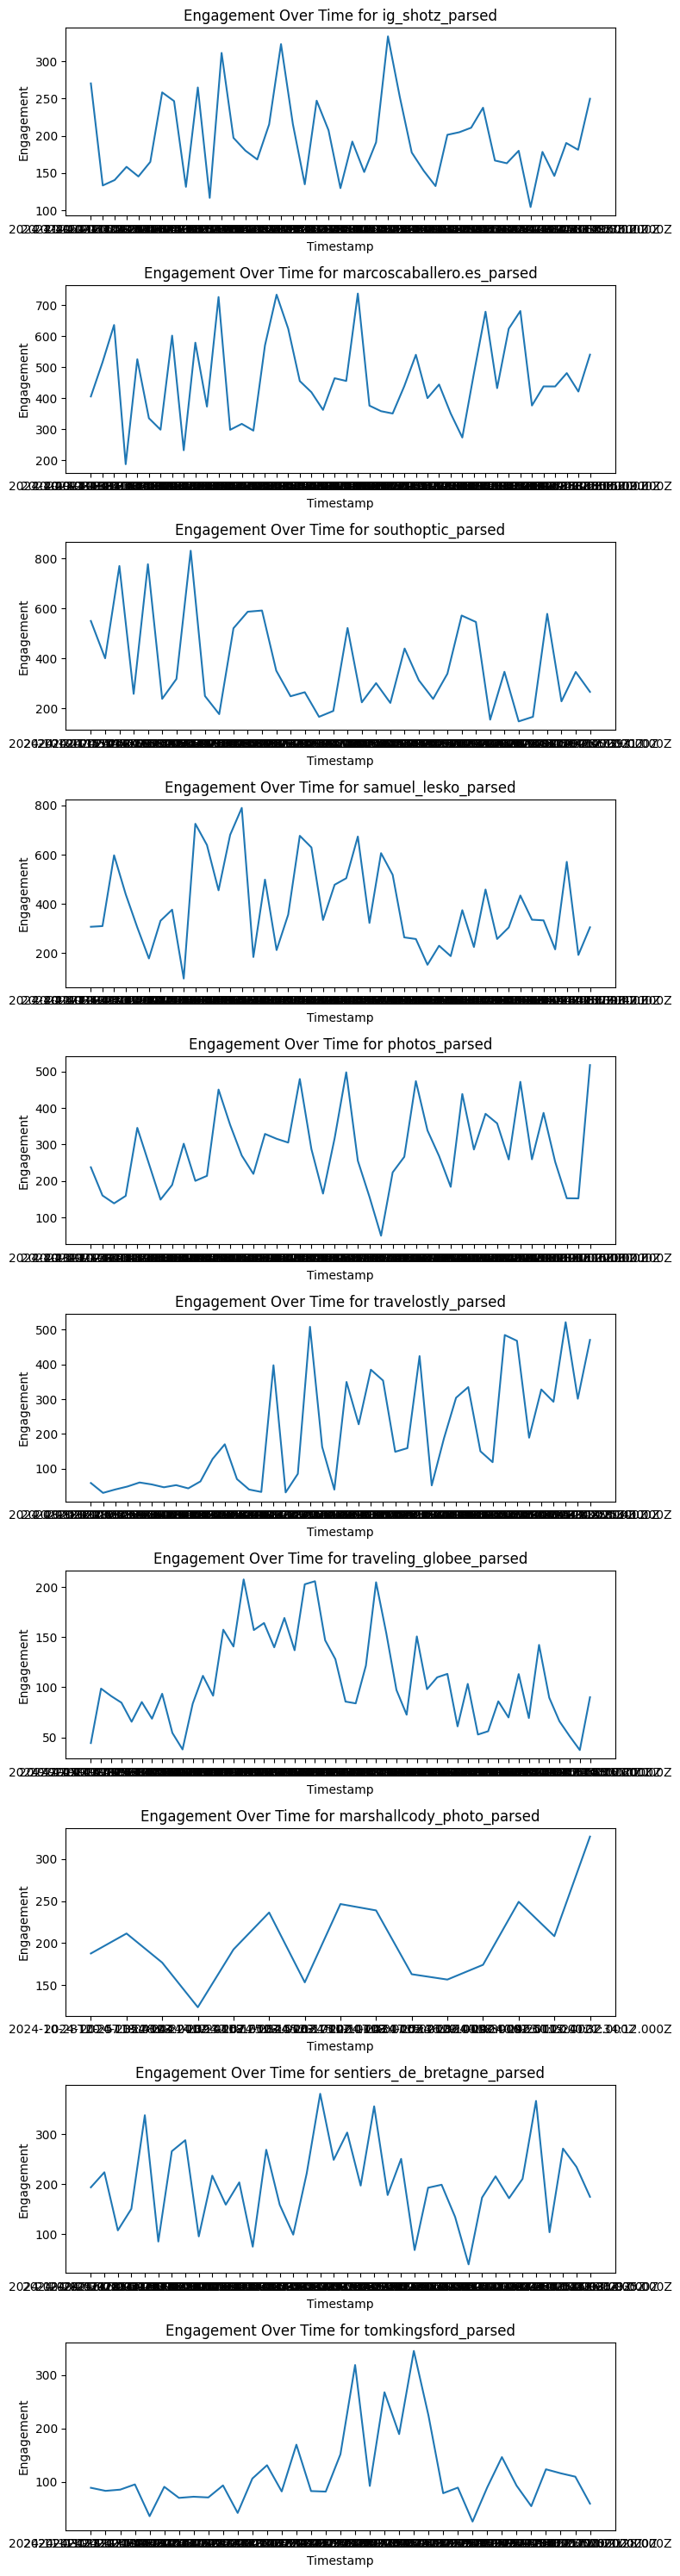

In [123]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n_profiles = len(dataframes)
plt.figure(figsize=(8, 3 * n_profiles))

for idx, (profile, df) in enumerate(dataframes.items(), start=1):
    plt.subplot(n_profiles, 1, idx)
    sns.lineplot(x=df["timestamp"], y=df["engagement"])
    plt.title(f"Engagement Over Time for {profile}")
    plt.xlabel("Timestamp")
    plt.ylabel("Engagement")
    plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


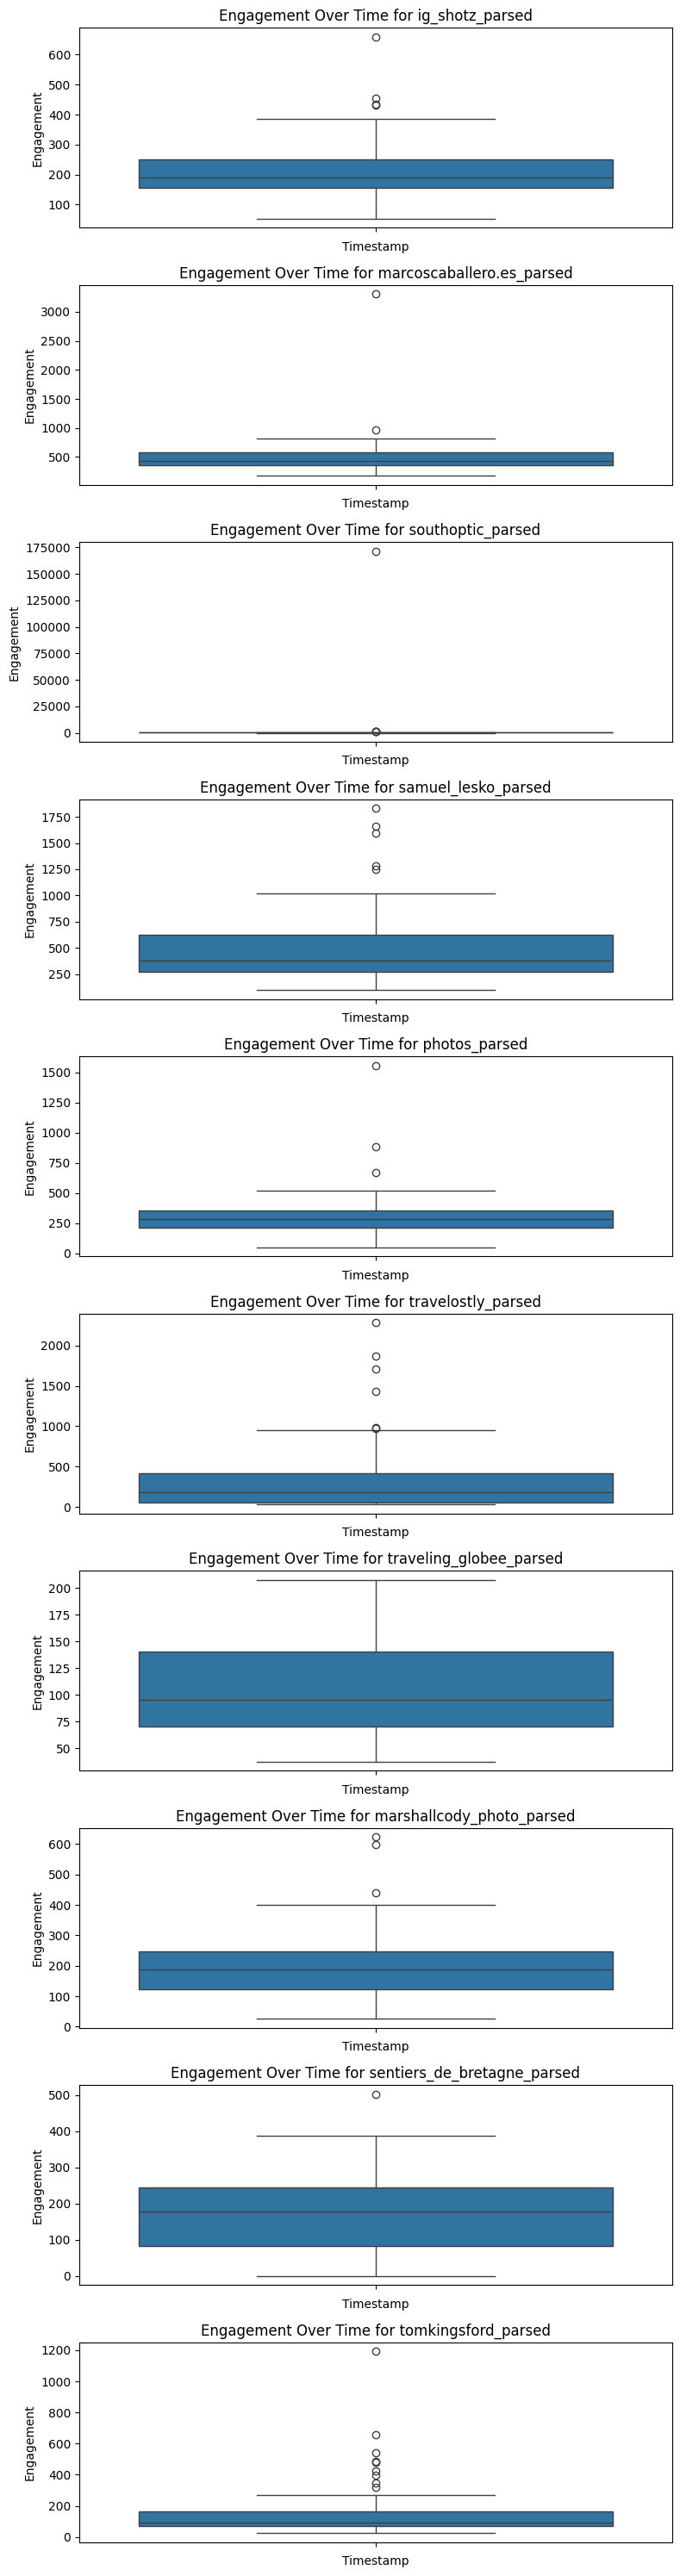

In [124]:
# Diretório onde os CSVs estão armazenados
csv_directory = "/content/drive/MyDrive/Projeto 2° Semestre Ciência de Dados/Parsed CSV/"

# Dicionário para armazenar os DataFrames
dataframes = {}

# Iterar sobre todos os arquivos CSV no diretório
for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        # Criar o caminho completo do arquivo
        file_path = os.path.join(csv_directory, file_name)

        # Carregar o CSV como DataFrame
        df = pd.read_csv(file_path)

        # Calcular engajamento (média geométrica)
        df["engagement"] = np.sqrt(df["likes_count"] * df["comments_count"])

        # Converter timestamps para datetime para ordenação e plotagem
        df["timestamp"] = pd.to_datetime(df["timestamp"])

        # Ordenar pelo timestamp
        df = df.sort_values(by="timestamp")

        # Adicionar ao dicionário
        profile_name = os.path.splitext(file_name)[0]
        dataframes[profile_name] = df

# Criar subplots para visualização
n_profiles = len(dataframes)
plt.figure(figsize=(8, 3 * n_profiles))

for idx, (profile, df) in enumerate(dataframes.items(), start=1):
    plt.subplot(n_profiles, 1, idx)
    sns.boxplot(y=df["engagement"])
    plt.title(f"Engagement Over Time for {profile}")
    plt.xlabel("Timestamp")
    plt.ylabel("Engagement")
    plt.tight_layout()

plt.show()

> Próximos Passos
- Exploração dos dados (EDA)
- Descobrir alguma forma de tornar a ETL que realmente importa automática (aluma forma de automatizar a tomada de decisão a depender do teste de normalidade, da estacionaridade, dos outiers, etc *(do engajamento)*)
- Normalizar por perfil
- Analisar resultados novamente
- Concatenar todos os dataframes em um só
- Montar ABT final
- Definir Ranking Engajamento com clusterização (qtd de estrelas = qtd de clusters)
- Pegar as imagens e cropar
- Associar imagens ao label do ranking (classificação)
- Desenvolver práticas de CNN para treinamento com os dados
- Treinar, testar, re-treinar, otimizar.., o modelo até ter um resultado aceitável
- Utilizar o streamlit pro colab para poder inserir os dados
- Tentar utilizar o Docker de alguma forma pra ter o ponto bônus